In [1]:
from google.colab import files
upload = files.upload()

Saving Homework_2022.xlsx to Homework_2022.xlsx


In [2]:
import pandas as pd 
import io

df = pd.read_excel(io.BytesIO(upload['Homework_2022.xlsx']))
df.head()

,idind,psu,status,age,male,industry,wage,public,internet,children,urban,educ
0,321,Кущевский р-,Село,41,1,НЕФТЕГАЗОВАЯ,25500,0,1,2,0,1
1,322,Кущевский р-,Село,51,1,СЕЛЬСКОЕ ХОЗ,12500,1,1,2,0,1
2,323,Кущевский р-,Село,26,0,"ТОРГОВЛЯ, БЫ",15500,0,1,0,0,2
3,324,Кущевский р-,Село,55,0,ОРГАНЫ УПРАВ,15500,1,1,2,0,2
4,325,Кущевский р-,Село,57,1,НЕФТЕГАЗОВАЯ,10500,1,0,2,0,1


## Пункт 1

In [3]:
import pandas as pd # работа с таблицами 
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import seaborn as sns # еще более классные графики
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка


plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=20)
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=20)

In [4]:
df['high'] = np.where(df['educ']==3, 1, 0)

In [5]:
ols_1 = smf.ols('wage ~ age + high + male + urban + children', data=df).fit()
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.930
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.70e-06
Time:                        12:51:38   Log-Likelihood:                -1521.4
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     139   BIC:                             3068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.24e+04   3251.833      3.813      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [6]:
ols_2 = smf.ols('wage ~ age + high + male + children', data=df).fit()
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.930
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.70e-06
Time:                        12:51:38   Log-Likelihood:                -1521.4
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     139   BIC:                             3068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.24e+04   3251.833      3.813      0.0

**Вывод:** Исходя из столбца  P>|t|, показывающего p-value гипотезы о незначимости коэффициента, видим, что все коэффициенты оказались значимыми (так как p-value больше уровня значимости), кроме коэффициента при переменной 'urban' и 'age' (т.к. p-value для age больше уровня значимости 0,05). P-value для children тоже больше 0,05, но несущественно, поэтому будем считать этот коэффициент значимым. В моей выборке только сельские жители, поэтому переменная urban в моей выборке у всех равна 0, следовательно коэффициент оценить для нее не получится. И что очевидно, убрав переменную из модели, получили ровно такую же модель.

**Уравнение оцененной модели:** $\widehat{Wage} = 12400 + 125.2 * Age + 4154.2 * High + 8030.8 * Male - 2091.26 * Children$

Модель показывает положительную зависимость зп от возраста, увеличение возраста на год приводит к увеличению зп на 125 рублей. Также положительная зависимость от наличия высшего образования, человек с высшим образованием получает на 4154 рубля больше. Коэффициент при Male логичен из экономических реалий, мужчины зарабатывают больше женщин, модель оценивает это различие на 8030 рублей. Также единственный отрицательный коэффициент при Children показывает, что при рождении каждого следующего ребенка зп снижается на 2091.

# Пункт 2

In [7]:
import math

df['log_wage'] = np.log(df['wage'])

In [8]:
ols_polulog = smf.ols('log_wage ~ age + high + male + urban + children', data=df).fit()
print(ols_polulog.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     8.361
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.50e-06
Time:                        12:51:39   Log-Likelihood:                -107.02
No. Observations:                 144   AIC:                             224.0
Df Residuals:                     139   BIC:                             238.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4122      0.176     53.369      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


1) При увеличении возраста на один год зарплата увеличивается на 0,6%

2) Если человек имеет высшее образование, то его зп больше, чем у человека без высшего образования на 24 процента.

3) Мужчины зарабатывают больше женщин на 43%.

4) Каждый последующий ребенок в семье сокращает зп на 13,7%

Коэффициент при urban незначимый, его невозможно посчитать, так как все наблюдения из села и имеют в этом столбце ноль.

Коэффициент при age незначимый, так как значение p-value при гипотезе о незначимости коэффицицента больше уровня значимости 0,05, и гипотеза о незначимости коэффициента при переменной возраста не отвергается.

**Уравнение оцененной модели:** $ln\widehat{Wage} = 9.4122 + 0.06 * Age + 0.2432 * High + 0.43 * Male - 0.1373 * Children$

## Пункт 3

In [9]:
df['log_age'] = np.log(df['age'])

In [10]:
ols_log = smf.ols('log_wage ~ log_age + high + male + urban + children', data=df).fit()
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     8.487
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.72e-06
Time:                        12:51:41   Log-Likelihood:                -106.81
No. Observations:                 144   AIC:                             223.6
Df Residuals:                     139   BIC:                             238.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7240      0.627     13.904      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


1) При увеличении возраста на один процент зарплата увеличивается на 0,2575%

2) Если человек имеет высшее образование, то его зп больше, чем у человека без высшего образования на 24,43 процента.

3) Мужчины зарабатывают больше женщин на 42,76%.

4) Каждый последующий ребенок в семье сокращает зп на 14,45%

Коэффициент при urban незначимый, его невозможно посчитать, так как все наблюдения из села и имеют в этом столбце ноль.

Коэффициент при ln(age) вызвает сомнения по поводу значимости, однако p-value относительно второй модели снизилось, то есть коэффициент при ln(age) более значим, чем коэффициент при age. Однако значение p-value = 0.163 неоднозначное, так в 16.3% случаев коэффициент незначим, в остальных случаях значим.

**Уравнение оцененной модели:** $ln\widehat{Wage} = 8.7240 + 0.2575 * lnAge + 0.2443 * High + 0.4276 * Male - 0.1445 * Children$

## Пункт 4

Вторую и третью модель мы можем сравнить по показателям adj. R-squared, AIC, BIC. Мы можем так сделать потому, что у этих моделей одинаковая объясняемая переменная logWage, а следовательно одинаковый масштаб прогнозов. По всем показателям третья модель лучше второй.


Линейную модель мы не можем сравнить с логарифмической, как в ячейке выше, поэтому проведем PE тест для выбора модели

In [11]:
# PE тест (тест для сравнения линейной и линейной в логарифмах моделей)
# можно сравнивать невложенные модели (в моделях есть набор общих регрессоров + в каждой дополнительно свои регрессоры)
# можно тестировать линейную модель против полулогарифмической, а не только против линейной в логарифмах
ypred = ols_1.predict() # прогнозы для обычной линейной модели

In [12]:
ln_ypred = ols_log.predict() # прогнозы для логарифмической модели

In [13]:
df['add1'] = ln_ypred - np.log(ypred)
df['add2'] = ypred - np.exp(ln_ypred)

In [14]:
reg1_add = smf.ols("wage ~ age + high + male + urban + children + add1", data = df).fit()
print(reg1_add.summary())
reg2_add = smf.ols("log_wage ~ log_age + high + male + urban + children + add2", data = df).fit()
print(reg2_add.summary())

# так как обе доп. переменные оказались незначимы, то не можем сделать выбор между моделями

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6.301
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.68e-05
Time:                        12:51:43   Log-Likelihood:                -1521.4
No. Observations:                 144   AIC:                             3055.
Df Residuals:                     138   BIC:                             3073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.218e+04   3898.756      3.124      0.0

Обе дополнительные переменные оказались незначимыми на уровне значимости 0,05, так как их p-value больше этого значения (для add1 0.919 и для add2 0.106), следовательно, по этому тесту не можем определить. Тогда возьмем логарифмическую модель, потому что wage - величина денег, а для денег лучше использовать логарифм.

## Пункт 5

# Дамми-переменные

Сформулируем гипотезы о значимости коэффициента при дамми-переменной male, ур-нь значимости 0,05.

$H_0$: коэффициенты при $male = malehigh = malechildren = malelogage = 0$

$H_1$: иначе

In [15]:
# создадим переменные взаимодействия
df['malehigh'] = df['male'] * df['high']
df['malechildren'] = df['male'] * df['children']
df['malelogage'] = df['male'] * df['log_age']

In [16]:
rest = smf.ols('log_wage ~ log_age + children + high', data = df).fit() # модель, для которой основная гипотеза не отвергается, т.е. коэффициенты при male и переменных взаимодействия равны нулю. 
rest.ssr #RSS_r

43.54397992435092

In [17]:
unrest = smf.ols('log_wage ~ log_age + male + children + high + malehigh + malechildren + malelogage', data = df).fit() #модель, содержащая переменные взаимодействия
unrest.ssr #RSS_ur

35.04808827403511

Посчитаем F-stat

$F_{stat} = \frac{(RSS_r - RSS_{ur}) / q}{RSS_{ur} / (n-k-1)} = \frac{(43.544 - 35.05) / 4}{35.05 / (144-7-1)} = 8.24$


In [18]:
2.1235/0.2577

8.240201785021343

Найдем F-crit при уровне значимости 0,05 и степенями свободы (4, 136)

$F_{crit} = F_{0.95, (4, 136)} = 2.438$

In [19]:
stats.f.ppf(0.95, 4, 136)

2.438240402671577

In [20]:
# рассчитаем p-value
print(f'p-value = {1 - stats.f.cdf(8.24, 4, 136)}')

p-value = 5.566944606738566e-06


Так как критическое значение меньше наблюдаемого, и P-value меньше уровня значимости, можем заключить то, что гипотеза $H_0$ о незначимости коэффициентов при male и переменных взаимодействия отвергается. Следовательно, различия в зарплатах мужчин и женщин существенны.

# Тест Чоу

Сформулируем гипотезы

$H_0: \beta_{muzh_i} = \beta_{zhen_i}$, i = 0, 1, 2, то есть выборки мужчин и женщин принадлежат одной генеральной совокупности

$H_1: \exists i: \beta_{muzh_i} \neq \beta_{zhen_i}$, i = 0, 1, 2, то есть выборки мужчин и женщин принадлежат разным генеральным совокупностям

In [21]:
rest = smf.ols('log_wage ~ log_age + children + high', data = df).fit() # модель, для которой основная гипотеза не отвергается, т.е. коэффициенты мужской и женской моделлей равны. 
rest.ssr #RSS_p

43.54397992435092

In [22]:
muzhiki = df[df['male'] == 1]

muzh = smf.ols('log_wage ~ log_age + children + high', data = muzhiki).fit() # модель отдельно для мужчин
muzh.ssr #RSS_m

15.849158665348588

In [23]:
zhenschini = df[df['male'] == 0]

zhen = smf.ols('log_wage ~ log_age + children + high', data = zhenschini).fit() # модель отдельно для женщин
zhen.ssr #RSS_zh

19.198929608686523

Рассчитаем F-статистику

$F_{stat} = \frac{(RSS_p - (RSS_m + RSS_{zh})) / (k + 1)}{(RSS_m + RSS_{zh}) / (n - 2k - 2)} = \frac{(43.54 - (15.85 + 19.2)) / 4}{(15.85 + 19.2) / (144 - 6 - 2)} = 8.236$

In [24]:
((43.54 - (15.85 + 19.2)) / 4) / ((15.85 + 19.2) / (144 - 6 - 2))

8.235663338088449

Найдем F-crit при уровне значимости 0,05 и степенями свободы (4, 136)

$F_{crit} = F_{0.95, (4, 136)} = 2.438$

In [25]:
# рассчитаем p-value
print(f'p-value = {1 - stats.f.cdf(8.236, 4, 136)}')

p-value = 5.600873728806022e-06


Так как критическое значение меньше наблюдаемого, и P-value меньше уровня значимости, можем заключить то, что гипотеза $H_0$ о принадлежности мужской и женской выборок одной генеральной совокупности отвергается. Следовательно, различия в зарплатах мужчин и женщин существенны.

## Пункт 6

Пример 1. Использование boxplot

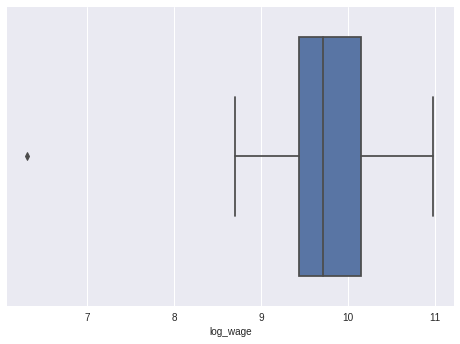

In [26]:
sns.boxplot(x=df['log_wage']) #boxplot для размера зарплаты

На графике видим, что присутствует выброс, чья величина зарплаты значительно ниже, чем у остальных. Выведем индекс выброса.

In [27]:
print(np.where(df['log_wage']<7))

(array([63]),)


Пример 2. Использование диаграммы рассеяния

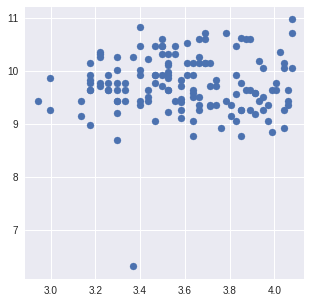

In [28]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df['log_age'], df['log_wage'])

plt.show()

По диаграмме видим выброс внизу, как и в прошлом примере.

Пример 3. Z-оценка

In [29]:
z = np.abs(stats.zscore(df['log_wage']))
print(np.where(z > 3))

(array([63]),)


Данный тест выявляет тот же единственный выброс.

Пример 4. Межквартильный диапазон

In [30]:
Q1 = np.percentile(df['log_wage'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['log_wage'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Above Upper bound
u_bound = Q3+1.5*IQR
upper = df['log_wage'] >= u_bound
 
print("Upper bound:",u_bound)
print(np.where(upper))
 
# Below Lower bound
l_bound = Q1-1.5*IQR
lower = df['log_wage'] <= l_bound
print("Lower bound:", l_bound)
print(np.where(lower))

Upper bound: 11.215858442930706
(array([], dtype=int64),)
Lower bound: 8.364059211506206
(array([63]),)


Данный способ похож на способ с boxplot. Определяет тот же выброс.

Пример 5. Стьюдентизированные остатки

In [31]:
influence = ols_log.get_influence()
inf_sum = influence.summary_frame()

results = pd.concat([df, inf_sum], axis = 1) # Объединим исходные данные с таблицей показателей

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:774: RuntimeWarning: invalid value encountered in true_divide
  dfbetas /= np.sqrt(np.diag(self.results.normalized_cov_params))


In [32]:
student_resid = influence.resid_studentized_external

In [33]:
# определим критическое значение для стьюдентизированных остатков

from scipy import stats
crit = stats.t(df=138).ppf((0.95))
print(crit)

1.6559703824298393


In [34]:
# Выведем номера всех возможных выбросов согласно стьюдентизированным остаткам

high_stud_res = pd.DataFrame((results[abs(student_resid) > crit]))
high_stud_res

,idind,psu,status,age,male,industry,wage,public,internet,children,...,dfb_high,dfb_male,dfb_urban,dfb_children,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
5,326,Кущевский р-,Село,27,0,ОБРАЗОВАНИЕ,6000,1,1,1,...,-0.193754,0.117350,NaN,-0.040598,0.019426,-1.911682,0.030907,-0.341400,-1.930337,-0.344732
13,334,Кущевский р-,Село,39,1,СЕЛЬСКОЕ ХОЗ,10500,0,1,0,...,0.092832,-0.127447,NaN,0.293915,0.021853,-1.654978,0.045684,-0.362100,-1.665505,-0.364403
23,344,Кущевский р-,Село,33,1,СТРОИТЕЛЬСТВ,40500,0,1,2,...,-0.075629,0.130808,NaN,0.146510,0.011921,1.657341,0.025379,0.267441,1.667931,0.269150
63,1154,Кущевский р-,Село,29,0,ЗДРАВООХРАНЕ,550,1,1,2,...,0.511878,0.617174,NaN,-0.765208,0.220145,-5.895623,0.036610,-1.149291,-6.783419,-1.322358
68,1354,Кущевский р-,Село,59,1,"ТРАНСПОРТ, С",58500,0,1,1,...,-0.068086,0.125080,NaN,-0.252167,0.030134,1.825988,0.051438,0.425212,1.841630,0.428854
79,1984,Кущевский р-,Село,48,0,"НАУКА, КУЛЬТ",40500,1,1,1,...,-0.141107,-0.207288,NaN,-0.199512,0.024904,2.032727,0.034901,0.386553,2.056194,0.391016
118,2352,Кущевский р-,Село,40,1,СЕЛЬСКОЕ ХОЗ,45500,0,1,2,...,-0.071650,0.133452,NaN,0.093797,0.010147,1.782330,0.018805,0.246745,1.796555,0.248714


Удалим выброс

In [35]:
df.drop(np.where(lower)[0], inplace = True)

## Пункт 7

In [36]:
ols_log = smf.ols('log_wage ~ log_age + high + male + children', data=df).fit()
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8.019
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.65e-06
Time:                        12:52:07   Log-Likelihood:                -85.990
No. Observations:                 143   AIC:                             182.0
Df Residuals:                     138   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1998      0.550     16.733      0.0

In [37]:
df.loc[:, ["log_age", "high", "male", "children"]].corr() #корреляционная матрица

,log_age,high,male,children
log_age,1.000000,-0.143886,0.083044,0.528338
high,-0.143886,1.000000,-0.168657,-0.123141
male,0.083044,-0.168657,1.000000,0.062294
children,0.528338,-0.123141,0.062294,1.000000


Судя по матрице, можем предположить прямую зависимость между log_age и children. Проведем более детальный анализ с помощью VIF

In [38]:
# Перейдем к расчету показателей VIF
# Если VIF(x) > 10, то вероятно существует проблема мультиколлинеарности

# VIF(log_age)
print(1/(1 - smf.ols("log_age ~ 1 + high + male + children", data = df).fit().rsquared))

1.4022894999534927


In [39]:
# VIF(high)
print(1/(1 - smf.ols("high ~ 1 + log_age + male + children", data = df).fit().rsquared))

1.0505795788887753


In [40]:
# VIF(male)
print(1/(1 - smf.ols("male ~ 1 + log_age + high + children", data = df).fit().rsquared))

1.033204812145329


In [41]:
# VIF(children)
print(1/(1 - smf.ols("children ~ 1 + log_age + high + male", data = df).fit().rsquared))

1.3918471406533954


In [42]:
# VIF(male)
print(1/(1 - smf.ols("age ~ children", data = df).fit().rsquared))

1.3368906215262357


In [43]:
variables = ols_log.model.exog
print(variables)
var_names = ols_log.model.exog_names
print(var_names)

[[1.         3.71357207 0.         1.         2.        ]
 [1.         3.93182563 0.         1.         2.        ]
 [1.         3.25809654 0.         0.         0.        ]
 [1.         4.00733319 0.         0.         2.        ]
 [1.         4.04305127 0.         1.         2.        ]
 [1.         3.29583687 1.         0.         1.        ]
 [1.         3.91202301 0.         0.         2.        ]
 [1.         3.8918203  0.         1.         2.        ]
 [1.         3.4657359  0.         1.         1.        ]
 [1.         3.63758616 0.         0.         1.        ]
 [1.         3.8501476  0.         1.         2.        ]
 [1.         3.73766962 0.         0.         2.        ]
 [1.         3.17805383 1.         0.         0.        ]
 [1.         3.66356165 0.         1.         0.        ]
 [1.         3.4339872  0.         0.         1.        ]
 [1.         3.49650756 0.         1.         2.        ]
 [1.         3.4339872  0.         1.         2.        ]
 [1.         4

In [44]:
# Рассчитаем VIF с помощью команды vif()

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"]   = var_names[1:]
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(1, variables.shape[1])]
print(vif)

   Variable  VIF Factor
0   log_age    1.402289
1      high    1.050580
2      male    1.033205
3  children    1.391847


Так как VIF для каждой переменной меньше 10, проблема мультиколлинеарности отсутствует

## Пункт 8

Метод Главных Компонент (МГК) используется для решения проблемы мультиколлинеарности и сокращения размерности данных путем перехода к ортогональным главным компонентам. Так как в моем случае мультиколлинеарности нет, то проводить тест не нужно. Одной из проблем является обоснование смысла главной компоненты, то есть ее интерпретация, так как она представляет из себя некоторую линейную комбинацию старых регрессоров, сделать это бывает достаточно сложно. 

## Пункт 9

In [45]:
ols_log = smf.ols('log_wage ~ log_age + high + male + urban + children', data=df).fit()

In [46]:
# Сохраним прогнозные значения
df['wage_hat'] = ols_log.predict()
# Сохраним остатки модели
df['resid'] = ols_log.resid
# Cоздадим переменную resid2 = resid^2
df['resid2'] = ols_log.resid**2
df

,idind,psu,status,age,male,industry,wage,public,internet,children,...,log_wage,log_age,add1,add2,malehigh,malechildren,malelogage,wage_hat,resid,resid2
0,321,Кущевский р-,Село,41,1,НЕФТЕГАЗОВАЯ,25500,0,1,2,...,10.146434,3.713572,-0.151224,3000.359493,0,2,3.713572,9.840340,0.306094,0.093693
1,322,Кущевский р-,Село,51,1,СЕЛЬСКОЕ ХОЗ,12500,1,1,2,...,9.433484,3.931826,-0.151918,3189.522184,0,2,3.931826,9.867982,-0.434498,0.188788
2,323,Кущевский р-,Село,26,0,"ТОРГОВЛЯ, БЫ",15500,0,1,0,...,9.648595,3.258097,-0.095275,1422.455506,0,0,0.000000,9.612462,0.036133,0.001306
3,324,Кущевский р-,Село,55,0,ОРГАНЫ УПРАВ,15500,1,1,2,...,9.648595,4.007333,-0.155475,2174.281064,0,0,0.000000,9.496917,0.151678,0.023006
4,325,Кущевский р-,Село,57,1,НЕФТЕГАЗОВАЯ,10500,1,0,2,...,9.259131,4.043051,-0.155922,3375.645189,0,2,4.043051,9.882069,-0.622938,0.388052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3431,Кущевский р-,Село,25,1,"ЛЕГКАЯ, ПИЩЕ",31500,0,1,1,...,10.357743,3.218876,-0.138211,2771.056130,0,1,3.218876,9.882905,0.474838,0.225471
140,3432,Кущевский р-,Село,30,0,ОБРАЗОВАНИЕ,22500,1,1,1,...,10.021271,3.401197,-0.110306,1902.496895,0,0,0.000000,9.727847,0.293424,0.086098
141,3433,Кущевский р-,Село,34,1,ЖИЛИЩНО-КОММ,24500,0,1,1,...,10.106428,3.526361,-0.034621,910.193840,1,1,3.526361,10.124326,-0.017898,0.000320
142,3559,Кущевский р-,Село,34,1,"СПОРТ, ТУРИЗ",19500,0,1,1,...,9.878170,3.526361,-0.034621,910.193840,1,1,3.526361,10.124326,-0.246156,0.060593


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

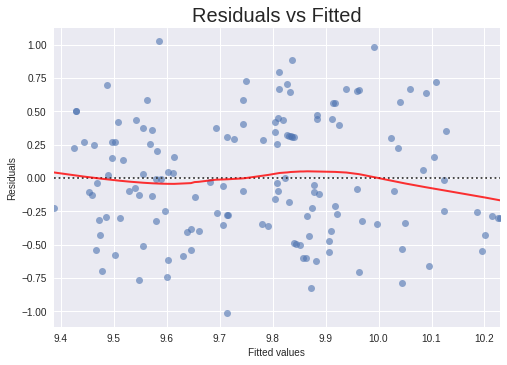

In [47]:
fig_1 = plt.figure(1)
fig_1.axes[0] = sns.residplot(df['wage_hat'], df['log_wage'],
                                  lowess=True,
                                  scatter_kws={'alpha': 0.6},
                                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
fig_1.axes[0].set_title('Residuals vs Fitted')
fig_1.axes[0].set_xlabel('Fitted values')
fig_1.axes[0].set_ylabel('Residuals')

Виден тренд вниз при больших прогнозах, возможно, не учли какие-то переменные или присутствует гетероскедастичность.

## Пункт 10

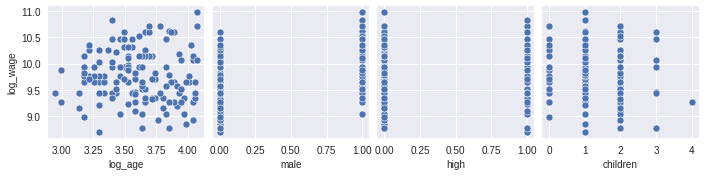

In [48]:
# Построим графики зависимостей логарифма зарплаты от факторов
sns.pairplot(df, x_vars=["log_age", "male", "high", "children"], y_vars=["log_wage"])

# Тест Уайта

Зададим гипотезы

$H_0$: ошибки гомоскедастичны, то есть дисперсия ошибок одинаковая для всех наблюдений.

$H_1$: ошибки гетероскедастичны, дисперсия ошибок неодинаковая для наблюдений

In [49]:
df['log_age2']=df['log_age']**2
df['high2']=df['high']**2
df['children2']=df['children']**2

df['log_ahigh']=df['log_age']*df['high']
df['log_achild']=df['log_age']*df['children']
df['log_amale']=df['log_age']*df['male']
df['highchild']=df['high']*df['children']
df['highmale']=df['high']*df['male']
df['childmale']=df['children']*df['male']

reg_white = smf.ols("resid2 ~ 1 + log_age + high + children + male + log_age2 + high2 + children2 + log_ahigh + log_achild + log_amale + highchild + highmale + childmale", df).fit()
print(reg_white.summary())

# Модель значима (p-value < 0.05 для F-статистики), следовательно, гипотеза H1 не отвергается, присутствует гетероскедастичность.
# Однако тест Уайта не дает нам точную форму гетероскедастичности.

                            OLS Regression Results                            
Dep. Variable:                 resid2   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.831
Date:                Thu, 15 Dec 2022   Prob (F-statistic):             0.0494
Time:                        12:52:39   Log-Likelihood:                 31.092
No. Observations:                 143   AIC:                            -36.18
Df Residuals:                     130   BIC:                             2.332
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1151      3.436      0.615      0.5

# Тест Бройша-Пагана (зависимость дисперсии от доп. факторов)

гипотезы такие же

In [57]:
from scipy import stats
import statsmodels
import statsmodels.stats.diagnostic as sm_diagnostic # тест Бройша-Пагана

X = df[["log_age", "high", "male", "children"]]
BP_test = sm_diagnostic.het_breuschpagan(resid=df['resid'], exog_het=X)
from statsmodels.compat import lzip
print(pd.DataFrame(lzip(['LM statistic', 'p-value',  'F-value', 'F: p-value'], BP_test)))

# Первое из выданных значений - значение тестовой статистики теста Бройша - Пагана, 
# Второе - значение p-value для выданной тестовой статистики. 
# Третье и четвёртое - значения тестовой статистики и её p-value для на уровне значимости 5% (табличное). 

              0             1
0  LM statistic  6.936207e+01
1       p-value  5.845871e-15
2       F-value  3.273221e+01
3    F: p-value  3.222325e-19


Так как p-value=0 < 0.05, то гипотеза H1 не отвергается, то есть гетероскедастичность присутствует.

# Тест Голдфелда - Квандта

гипотезы такие же

In [58]:
sm_diagnostic.het_goldfeldquandt(y = df["log_wage"], x = X, alternative = "two-sided")

(0.6988949559131987, 0.14331226180873124, 'two-sided')

Значение p-value > ур-ня значимости 0,05, следовательно, основная гипотеза о гомоскедастичности не отвергается.

Два из трех тестов показали наличие гетероскедастичности, решим эту проблему с помощью робастных ошибок в форме Уайта.

In [60]:
reg_robust = ols_log.get_robustcov_results()
print(reg_robust.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     9.075
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.54e-06
Time:                        13:23:15   Log-Likelihood:                -85.990
No. Observations:                 143   AIC:                             182.0
Df Residuals:                     138   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1998      0.543     16.948      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


Сравним с обычной моделью

In [61]:
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8.019
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.65e-06
Time:                        13:24:21   Log-Likelihood:                -85.990
No. Observations:                 143   AIC:                             182.0
Df Residuals:                     138   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1998      0.550     16.733      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Как и ожидалось робастные ошибки помогли снизить стандартные ошибки для intercept, high, male, но увеличились для log_age и children. Если гетероскедастичность и присутствовала, то в очень незначительном масштабе, что видно по тестам, поэтому решение сильно не изменило параметры модели

## Пункт 11

## Тест Рэмзи

$H_0$: выбранная спецификация верна

$H_1$: выбранная спецификация не верна

In [65]:
ols_log = smf.ols('log_wage ~ log_age + high + male + children', data=df).fit()

In [66]:
import statsmodels.stats.outliers_influence as oi

print(oi.reset_ramsey (ols_log, degree = 2))

<F test: F=array([[1.19827023]]), p=0.2755884742114296, df_denom=137, df_num=1>


Так как p-value = 0.276 > 0.05 то есть уровня значимости, то спецификация модели выбрана верно, гипотеза $H_0$ не отвергается.

Проведем тест вручную

$H_0$: коэффициент при wage_hat2 $= 0$

$H_1$: коэффициент при wage_hat2 $\neq 0$

In [67]:
df['wage_hat2'] = df['wage_hat']**2 #вспомогательный регрессор

In [68]:
ols_log_ramsey = smf.ols('log_wage ~ log_age + high + male + children + wage_hat2', data=df).fit() # модель со вспомогательным регрессором
ols_log_ramsey.ssr # RSS_ur

27.630417742900477

In [69]:
ols_log.ssr # RSS_r

27.872087137526588

Рассчитаем F-статистику:

$F_{stat} = \frac{(RSS_r - RSS_{ur}) / (m - 1)}{RSS_{ur} / (n - k - m)} = \frac{(27.872 - 27.63) / (2-1)}{27.63 / (143-4-2)} = 1.2$

In [70]:
(27.872 - 27.63) / (27.63 / (143-4-2))

1.1999276149113327

Найдем F-crit при уровне значимости 0,05 и степенями свободы (1, 137)

$F_{crit} = F_{0.95, (1, 137)} = 3.91$

In [72]:
stats.f.ppf(0.95, 1, 137)

3.910234199410577

In [73]:
# рассчитаем p-value
print(f'p-value = {1 - stats.f.cdf(1.2, 1, 137)}')

p-value = 0.27524370913547913


Так как p-value = 0.276 > 0.05 то есть уровня значимости, то гипотеза $H_0$ не отвергается, коэффициент при вспомогательном регрессоре равен нулю, а значит, спецификация модели выбрана верно.

## Пункт 12

In [75]:
ols_log = smf.ols('log_wage ~ log_age + high + male + urban + children', data=df).fit()
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8.019
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.65e-06
Time:                        15:39:35   Log-Likelihood:                -85.990
No. Observations:                 143   AIC:                             182.0
Df Residuals:                     138   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1998      0.550     16.733      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Незначимыми являются кэфы при urban и log_age, так как p-value гипотезы об их незначимости больше уровня значимости 5%.

In [78]:
znach_log = smf.ols('log_wage ~ high + male + children', data=df).fit()
print(znach_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     10.51
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.82e-06
Time:                        15:57:46   Log-Likelihood:                -86.311
No. Observations:                 143   AIC:                             180.6
Df Residuals:                     139   BIC:                             192.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6273      0.088    109.471      0.0

Коэффициент при children стал незначимым на уровне значимости 5%

In [84]:
#модель только с значимыми переменными

znach_log = smf.ols('log_wage ~ high + male', data=df).fit()
print(znach_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.68e-06
Time:                        16:11:26   Log-Likelihood:                -88.152
No. Observations:                 143   AIC:                             182.3
Df Residuals:                     140   BIC:                             191.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5099      0.063    150.236      0.0

**Уравнение оцененной модели:** $ln\widehat{Wage} = 9.5 + 0.2148 * High + 0.3772 * Male$

In [79]:
ols_1 = smf.ols('wage ~ age + high + male + urban + children', data=df).fit()
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     7.309
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.28e-05
Time:                        16:04:20   Log-Likelihood:                -1510.6
No. Observations:                 143   AIC:                             3031.
Df Residuals:                     138   BIC:                             3046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.292e+04   3274.752      3.944      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Так как модель из первого пункта линейная, а текущая полулогарифмическая, можем использовать для сравнения тест Бокса-Кокса, метод Зарембки, PE-тест.

Проведем PE-test

In [80]:
ypred = ols_1.predict() # прогнозы для обычной линейной модели
znach_ypred = znach_log.predict() # прогнозы для логарифмической модели

# сравним сначала первую и вторую модели
df['add3'] = znach_ypred - np.log(ypred)
df['add4'] = ypred - np.exp(znach_ypred)

In [86]:
reg3_add = smf.ols("wage ~ age + high + male + urban + children + add3", data = df).fit()
print(reg3_add.summary())
reg4_add = smf.ols("log_wage ~ male + high + add4", data = df).fit()
print(reg4_add.summary())

# так как обе доп. переменные оказались незначимы, то не можем сделать выбор между моделями

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     5.819
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           6.62e-05
Time:                        16:12:38   Log-Likelihood:                -1510.6
No. Observations:                 143   AIC:                             3033.
Df Residuals:                     137   BIC:                             3051.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.392e+04   5276.418      2.638      0.0

Обе дополнительные переменные оказались незначимыми на ур-не значимости 5%, следовательно, сделать выбор между двумя моделями не сможем.

## Пункт 13

Существует статистическая взаимосвязь между зп и возрастом, только она не линейная, как делали мы, она квадратическая. То есть до определнного возраста зп работника повышается с каждым годом, перейдя это пороговое значение, она начинает снижаться. Проверим квадратическую взаимосвязь

$H_0:$ коэффициенты при $age2 = age =  0$

$H_1:$ иначе

In [87]:
df['age2'] = df['age'] ** 2

In [98]:
age2_ols = smf.ols("log_wage ~ age + age2 + male + high", data = df).fit() # модель с квадратической связью
print(age2_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     6.843
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.70e-05
Time:                        17:17:54   Log-Likelihood:                -87.996
No. Observations:                 143   AIC:                             186.0
Df Residuals:                     138   BIC:                             200.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3702      0.545     17.205      0.0

In [91]:
age2_ols.ssr # RSS_ur модели с кв.связью

28.665048918419597

In [92]:
znach_log.ssr # RSS_r основной модели

28.72779703293811

Посчитаем F-stat

$F_{stat} = \frac{(RSS_r - RSS_{ur}) / q}{RSS_{ur} / (n-k-1)} = \frac{(28.728 - 28.665) / 2}{28.665 / (143-4-1)} = 0.15$

In [94]:
((28.72779-28.6650) / 2) / (28.6650489/138)

0.15114259930671103

Найдем F-crit при уровне значимости 0,05 и степенями свободы (2, 138)

$F_{crit} = F_{0.95, (2, 138)} = 3,06$

In [93]:
stats.f.ppf(0.95, 2, 138)

3.0617156997722694

In [95]:
# рассчитаем p-value
print(f'p-value = {1 - stats.f.cdf(0,15, 2, 138)}')

p-value = 1.0


Так как критическое значение больше наблюдаемого, и P-value больше уровня значимости, можем заключить то, что гипотеза $H_0$ о незначимости коэффициентов не отвергается. Следовательно, в нашей модели нет квадратической зависимости логарифма зп от возраста.

## Пункт 14

Итоговая модель

**Уравнение оцененной модели:** $ln\widehat{Wage} = 9.5 + 0.2148 * High + 0.3772 * Male$

In [96]:
znach_log = smf.ols('log_wage ~ high + male', data=df).fit()
print(znach_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.68e-06
Time:                        17:15:04   Log-Likelihood:                -88.152
No. Observations:                 143   AIC:                             182.3
Df Residuals:                     140   BIC:                             191.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5099      0.063    150.236      0.0

# Проблемы

1) Слишком мало объектов в выборке. 144 объекта - очень мало для построения адекватной модели. С учетом большого разброса значений достигнуть высокого качества модели очень сложно.

2) Пропуск важной переменной. Проверяется с помощью теста Рэмси, в работе проверяли только один вспомогательный регрессор, этого недостаточно. Нужно проверить больше регрессоров тестом Рэмси.

3) Включение лишних переменных. Проблема приводит к неэффективности оценок коэффициентов, диагностика с помощью F теста на группу незначимых переменных.

4) Дамми-переменная пола является своего рода частью константы (intercept) и не определяет наклон графика модели, тогда как в теории участие пола в наклоне графика зп весьма очевидно. 

5) Не стали разбивать выборку отдельно на мужчин и на женщин, хотя, как выяснилось, они принадлежат разным генеральным совокупностям.